In [106]:
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns', 50) 

# Keşifsel Veri Analizi 

In [86]:
df = pd.read_csv('datasets/ail_frx.csv')
df.head()

,date,open,high,low,close
0,"""1355342400000""","""6.5931159420289855""","""6.594059420289855""","""6.5854333333333335""",NaN
1,"""1355346000000""","""6.590060869565217""","""6.593160869565217""","""6.581030434782608""",NaN
2,"""1355349600000""","""6.591004347826087""","""6.599405797101449""","""6.576357971014493""","""6.590465217391304"""
3,"""1355353200000""","""6.591633333333333""","""6.594463768115943""","""6.587230434782608""","""6.591678260869565"""
4,"""1355356800000""","""6.592172463768116""","""6.594688405797101""","""6.586376811594203""","""6.59131884057971"""


In [87]:
df.shape

(11322, 5)

In [88]:
df.describe()

,date,open,high,low,close
count,11322,11322,11322,11322,10445
unique,11322,9689,9648,9790,9054
top,"""1355342400000""","""13.250388405797102""","""13.25627391304348""","""13.250388405797102""","""13.25627391304348"""
freq,1,14,15,11,14


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11322 entries, 0 to 11321
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    11322 non-null  object
 1   open    11322 non-null  object
 2   high    11322 non-null  object
 3   low     11322 non-null  object
 4   close   10445 non-null  object
dtypes: object(5)
memory usage: 442.4+ KB


close sütununda eksik veriler var. Ayrıca veri tiplerinin  float64 olması gerek object değil ! 

In [90]:
df['date'] = pd.to_datetime(df['date'].str.strip('"').astype('int64'), unit='ms')
df.set_index('date', inplace=True)  # Tarih sütununu indeks olarak ayarla
for column in ['open', 'high', 'low', 'close']:
    if df[column].dtype == 'O':
        df[column] = df[column].str.strip('"').astype(float)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11322 entries, 2012-12-12 20:00:00 to 2014-11-30 21:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    11322 non-null  float64
 1   high    11322 non-null  float64
 2   low     11322 non-null  float64
 3   close   10445 non-null  float64
dtypes: float64(4)
memory usage: 442.3 KB


In [92]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles))

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True) 

num_cols = ["open","high","low","close"]
for col in num_cols:
    print(f'{col} için: ')
    num_summary(df, col)
    print('#############################')

open için: 
count    11322.000000
mean         9.942839
std          2.356181
min          6.547919
5%           6.693412
10%          7.497615
20%          8.138165
30%          8.357375
40%          8.439188
50%          8.575274
60%          9.660867
70%         12.103613
80%         12.661263
90%         13.416135
95%         13.795660
99%         14.385964
max         14.529026
Name: open, dtype: float64
#############################
high için: 
count    11322.000000
mean         9.951800
std          2.358256
min          6.553041
5%           6.698291
10%          7.505239
20%          8.143035
30%          8.362344
40%          8.443645
50%          8.581092
60%          9.671344
70%         12.110608
80%         12.682720
90%         13.428382
95%         13.799394
99%         14.396525
max         14.728325
Name: high, dtype: float64
#############################
low için: 
count    11322.000000
mean         9.932069
std          2.352280
min          6.538349
5%           6.

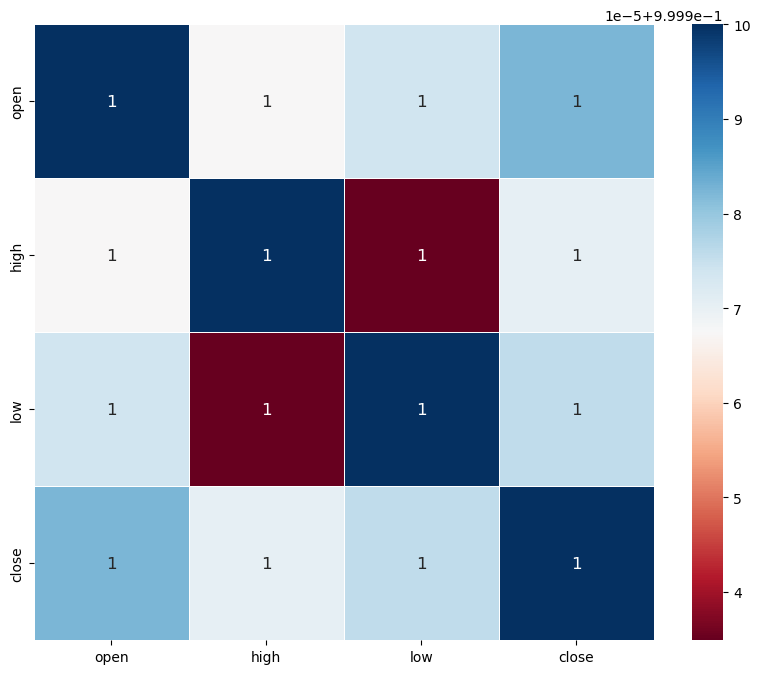

In [93]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)

correlation_matrix(df, num_cols)

# Veri Önişleme & Özellik Mühendisliği 

Eksik Değer Analizi 

In [94]:
missing_ratios = df.isnull().mean() * 100
missing_ratios

open     0.000000
high     0.000000
low      0.000000
close    7.745981
dtype: float64

11322 close verisinin %7.74 ü eksiktir. 

In [95]:
close normal dağılıma uyuyor mu ? uyuyorsa ortalama ile doldurulabilir.

SyntaxError: invalid syntax (3682781649.py, line 1)

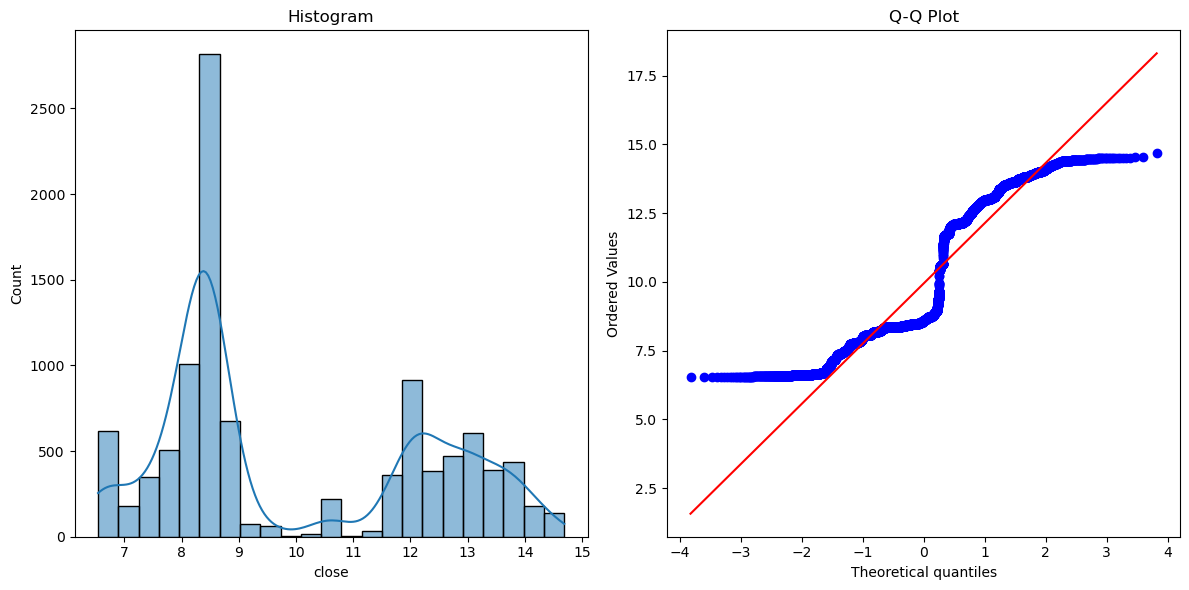

Shapiro-Wilk Testi:
Statistics=0.863, p=0.000
D'Agostino's K^2 Testi:
Statistics=183393.750, p=0.000
Örneklem normal dağılıma uygun görünmüyor.


C:\Users\yigit_5rkz30x\AppData\Local\Temp\ipykernel_12056\2590519624.py:16: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10445.
  stat, p = shapiro(df['close'].dropna())


In [96]:
# Histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['close'].dropna(), kde=True)
plt.title('Histogram')

# Q-Q Grafiği
plt.subplot(1, 2, 2)
stats.probplot(df['close'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

# Shapiro-Wilk Testi
stat, p = shapiro(df['close'].dropna())
print('Shapiro-Wilk Testi:')
print('Statistics=%.3f, p=%.3f' % (stat, p))

# D'Agostino's K^2 Testi
stat, p = normaltest(df['close'].dropna())
print("D'Agostino's K^2 Testi:")
print('Statistics=%.3f, p=%.3f' % (stat, p))

# p değerlerine göre değerlendirme
if p > 0.05:
    print('Örneklem normal dağılıma (Gaussian) uygun görünüyor.')
else:
    print('Örneklem normal dağılıma uygun görünmüyor.')

In [97]:
close_median = df["close"].median()
df["close"] = df["close"].fillna(close_median)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11322 entries, 2012-12-12 20:00:00 to 2014-11-30 21:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    11322 non-null  float64
 1   high    11322 non-null  float64
 2   low     11322 non-null  float64
 3   close   11322 non-null  float64
dtypes: float64(4)
memory usage: 442.3 KB


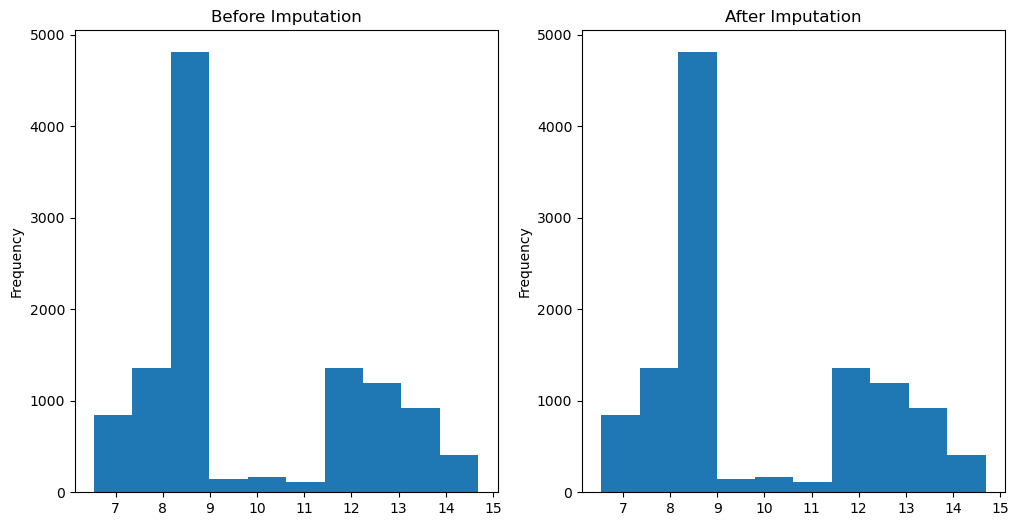

In [99]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['close'].dropna().plot(kind='hist', title='Before Imputation')
plt.subplot(1, 2, 2)
df['close'].plot(kind='hist', title='After Imputation')
plt.show()

In [100]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

for col in num_cols:
    print(col, outlier_thresholds(df, col))

open (2.4238125000000004, 18.093413949275362)
high (2.4240315217391295, 18.110840217391306)
low (2.418325724637681, 18.075392391304348)
close (2.6549871376811582, 17.829127717391305)


In [101]:
def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    print(check_outlier(df, col))

False
False
False
False


In [102]:
df.head()

,open,high,low,close
date,,,,
2012-12-12 20:00:00,6.593116,6.594059,6.585433,8.567007
2012-12-12 21:00:00,6.590061,6.593161,6.581030,8.567007
2012-12-12 22:00:00,6.591004,6.599406,6.576358,6.590465
2012-12-12 23:00:00,6.591633,6.594464,6.587230,6.591678
2012-12-13 00:00:00,6.592172,6.594688,6.586377,6.591319


In [103]:
# Eğer 'date' DataFrame'in indeksi ise, onu sütun olarak geri alın.
if 'date' not in df.columns:
    df.reset_index(inplace=True)


In [109]:
# 'date' sütununu datetime türüne çevirme
df['date'] = pd.to_datetime(df['date'])

# Zaman bileşenlerini çıkar
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek  # Haftanın günü (0=Pazartesi, 6=Pazar)
df['is_weekend'] = df['date'].dt.dayofweek >= 5  # Cumartesi veya Pazar ise True döndürür

In [110]:
df.head()

,date,open,high,low,close,year,month,day,hour,day_of_week,is_weekend
0,2012-12-12 20:00:00,6.593116,6.594059,6.585433,8.567007,2012,12,12,20,2,False
1,2012-12-12 21:00:00,6.590061,6.593161,6.581030,8.567007,2012,12,12,21,2,False
2,2012-12-12 22:00:00,6.591004,6.599406,6.576358,6.590465,2012,12,12,22,2,False
3,2012-12-12 23:00:00,6.591633,6.594464,6.587230,6.591678,2012,12,12,23,2,False
4,2012-12-13 00:00:00,6.592172,6.594688,6.586377,6.591319,2012,12,13,0,3,False


Desen ve Trend Analizi

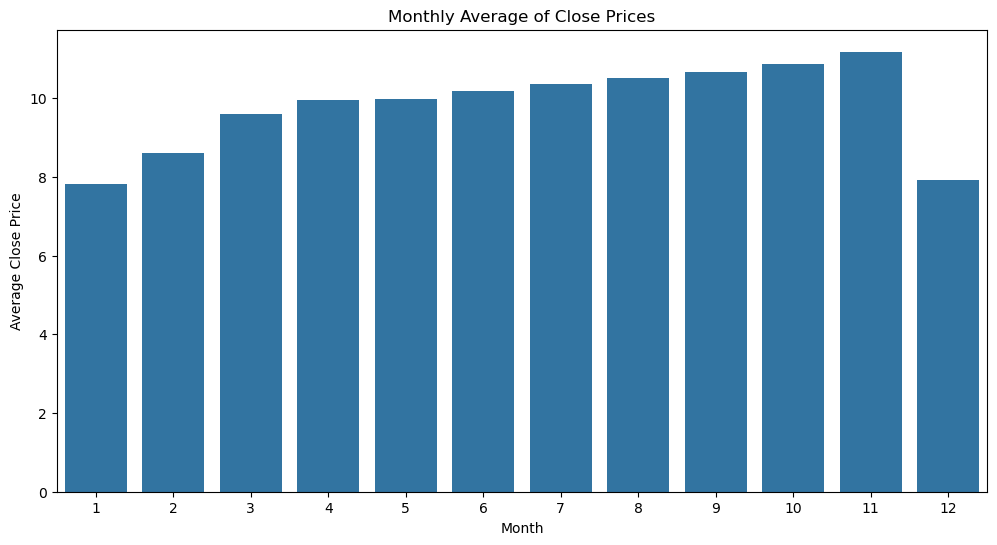

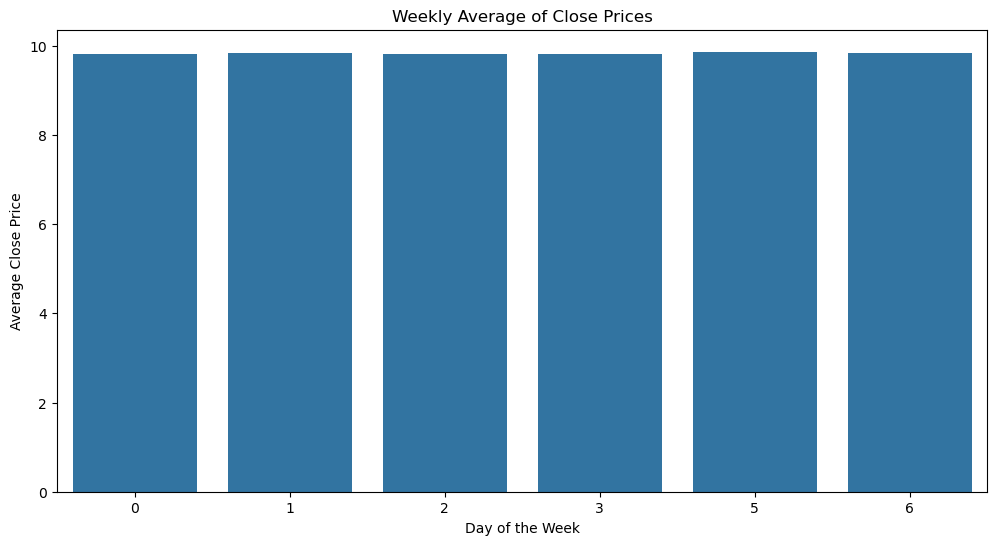

                 date     close     lag_1     lag_2
2 2012-12-12 22:00:00  6.590465  8.567007  8.567007
3 2012-12-12 23:00:00  6.591678  6.590465  8.567007
4 2012-12-13 00:00:00  6.591319  6.591678  6.590465
5 2012-12-13 01:00:00  6.590465  6.591319  6.591678
6 2012-12-13 02:00:00  6.589028  6.590465  6.591319


In [112]:
# Ay ve haftanın gününe göre 'close' fiyatının ortalamasını hesaplama
monthly_avg = df.groupby(['month']).agg({'close': 'mean'}).reset_index()
weekly_avg = df.groupby(['day_of_week']).agg({'close': 'mean'}).reset_index()

# Ay bazında fiyatların ortalamasını çizdirme
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='close', data=monthly_avg)
plt.title('Monthly Average of Close Prices')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.show()

# Haftanın günü bazında fiyatların ortalamasını çizdirme
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='close', data=weekly_avg)
plt.title('Weekly Average of Close Prices')
plt.xlabel('Day of the Week')
plt.ylabel('Average Close Price')
plt.show()

# Lag özellikleri oluşturma
df['lag_1'] = df['close'].shift(1)  # 1 saat önceki kapanış fiyatı
df['lag_2'] = df['close'].shift(2)  # 2 saat önceki kapanış fiyatı

# NaN değerleri temizleme
df.dropna(subset=['lag_1', 'lag_2'], inplace=True)

print(df[['date', 'close', 'lag_1', 'lag_2']].head())

In [113]:
df.head()

,date,open,high,low,close,year,month,day,hour,day_of_week,is_weekend,lag_1,lag_2
2,2012-12-12 22:00:00,6.591004,6.599406,6.576358,6.590465,2012,12,12,22,2,False,8.567007,8.567007
3,2012-12-12 23:00:00,6.591633,6.594464,6.587230,6.591678,2012,12,12,23,2,False,6.590465,8.567007
4,2012-12-13 00:00:00,6.592172,6.594688,6.586377,6.591319,2012,12,13,0,3,False,6.591678,6.590465
5,2012-12-13 01:00:00,6.591499,6.596800,6.584759,6.590465,2012,12,13,1,3,False,6.591319,6.591678
6,2012-12-13 02:00:00,6.591319,6.593386,6.585478,6.589028,2012,12,13,2,3,False,6.590465,6.591319


In [118]:
num_cols = ['open', 'high', 'low', 'close', 'lag_1', 'lag_2']

In [124]:
from sklearn.preprocessing import StandardScaler

# Standartlaştırma
X_scaled = StandardScaler().fit_transform(df[num_cols])
df[num_cols] = pd.DataFrame(X_scaled, columns=df[num_cols].columns)

In [125]:
df.head()

,date,open,high,low,close,year,month,day,hour,day_of_week,is_weekend,lag_1,lag_2
2,2012-12-12 22:00:00,-1.423261,-1.424933,-1.423526,-1.414673,2012,12,12,22,2,False,-1.413878,-1.413337
3,2012-12-12 23:00:00,-1.423566,-1.424705,-1.423965,-1.414477,2012,12,12,23,2,False,-1.414505,-1.413709
4,2012-12-13 00:00:00,-1.424024,-1.422304,-1.422838,-1.410950,2012,12,13,0,3,False,-1.414309,-1.414337
5,2012-12-13 01:00:00,-1.420801,-1.422075,-1.418979,-1.410676,2012,12,13,1,3,False,-1.410781,-1.414141
6,2012-12-13 02:00:00,-1.420114,-1.421675,-1.418731,-1.410754,2012,12,13,2,3,False,-1.410507,-1.410612


# Modelleme